# Books Recommendation

## Data Preparation, EDA & Data Visualization

In [1]:
# Importing warnings and libraries

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc = {'axes.facecolor':'#f2f2f2', 'figure.facecolor':'#ffffff'})

import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objects import Layout
import plotly.io as pio
pio.renderers.default = 'notebook'
import folium
from folium import plugins
import ipywidgets as widgets
from ipywidgets import Layout, interactive, VBox, HBox

import pycountry as pc
from geopy.geocoders import Nominatim

import requests
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Loading the dataset 'BX-Books'

BX_Books = pd.read_csv('BX-Books.csv', sep = ';', encoding = 'latin-1', header = [0], on_bad_lines = 'skip', low_memory = False)
BX_Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
# Loading the dataset 'BX-Users'

BX_Users = pd.read_csv('BX-Users.csv', sep = ';', encoding = 'latin-1', header = [0], on_bad_lines = 'skip', low_memory = False)
BX_Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
# Loading the dataset 'BX_Book_Ratings'

BX_Book_Ratings = pd.read_csv('BX-Book-Ratings.csv', sep = ';', encoding = 'latin-1', header = [0], on_bad_lines = 'skip',
                              low_memory = False)
BX_Book_Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# Observing the information of the datasets

print('BOOKS:'), BX_Books.info(), print(), print('USERS:'), BX_Users.info(), print(), print('RATINGS:'), BX_Book_Ratings.info();

BOOKS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB

USERS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int6

In [6]:
# Creating a copy for each dataset

users = BX_Users.copy()
books = BX_Books.copy()
ratings = BX_Book_Ratings.copy()

### Merging the datasets

In [7]:
# Merging the 'users' dataset with the 'ratings' dataset

bookrec = users.merge(ratings, on = 'User-ID', how = 'left')
bookrec

,User-ID,Location,Age,ISBN,Book-Rating
0,1,"nyc, new york, usa",NaN,NaN,NaN
1,2,"stockton, california, usa",18.0,0195153448,0.0
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,NaN,NaN
...,...,...,...,...,...
1323350,278854,"portland, oregon, usa",NaN,0553579606,8.0
1323351,278855,"tacoma, washington, united kingdom",50.0,NaN,NaN
1323352,278856,"brampton, ontario, canada",NaN,NaN,NaN
1323353,278857,"knoxville, tennessee, usa",NaN,NaN,NaN


In [8]:
# Dropping the missing values created by the merging

bookrec.dropna(inplace = True)
bookrec.shape

(840288, 5)

In [9]:
# Merging the 'bookrec' updated dataset with the 'books' dataset

bookrec = bookrec.merge(books, on = ['ISBN'], how = 'left')
bookrec

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,10,"albacete, wisconsin, spain",26.0,1841721522,0.0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...
2,10,"albacete, wisconsin, spain",26.0,8477024456,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,"weston, ,",14.0,0375759778,7.0,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...
4,20,"langhorne, pennsylvania, usa",19.0,0425163091,0.0,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
840283,278851,"dallas, texas, usa",33.0,1558531025,8.0,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson,http://images.amazon.com/images/P/1558531025.0...,http://images.amazon.com/images/P/1558531025.0...,http://images.amazon.com/images/P/1558531025.0...
840284,278851,"dallas, texas, usa",33.0,1566910102,0.0,Oregon Handbook (The Americas Series),Stuart Warren,1995,Pub Group West,http://images.amazon.com/images/P/1566910102.0...,http://images.amazon.com/images/P/1566910102.0...,http://images.amazon.com/images/P/1566910102.0...
840285,278851,"dallas, texas, usa",33.0,1569661057,10.0,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...
840286,278851,"dallas, texas, usa",33.0,1885071213,7.0,"Highpoint Adventures, A Pocket Guide to the 50...",Charlie Winger,1999,Sequoia Publishing,http://images.amazon.com/images/P/1885071213.0...,http://images.amazon.com/images/P/1885071213.0...,http://images.amazon.com/images/P/1885071213.0...


In [10]:
# Dropping the missing values created by the merging

bookrec.dropna(inplace = True)
bookrec.shape

(753296, 12)

In [11]:
# Renaming some columns, dropping some columns and rearranging the order of the remaining ones

# Renaming some columns to replace the '-' with '_', as the hifen is also a minus sign when out of quote marks
# Dropping columns 'Image-URL-S' and 'Image-URL-M' to keep only the large size
# Rearranging to put the information about rating after all the details of the books

bookrec.rename(columns = {'User-ID': 'user_id', 'Location': 'location', 'Age': 'age', 'ISBN': 'isbn',
                          'Book-Rating': 'book_rating', 'Book-Title': 'book_title', 'Book-Author': 'book_author',
                          'Year-Of-Publication': 'year_pub', 'Publisher': 'publisher', 'Image-URL-L': 'image_url_l'},
               inplace = True)

bookrec = bookrec[['user_id', 'age', 'location', 'isbn', 'book_title', 'book_author', 'year_pub', 'book_rating', 'image_url_l']]

bookrec

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l
0,2,18.0,"stockton, california, usa",0195153448,Classical Mythology,Mark P. O. Morford,2002,0.0,http://images.amazon.com/images/P/0195153448.0...
1,10,26.0,"albacete, wisconsin, spain",1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,0.0,http://images.amazon.com/images/P/1841721522.0...
3,19,14.0,"weston, ,",0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,7.0,http://images.amazon.com/images/P/0375759778.0...
4,20,19.0,"langhorne, pennsylvania, usa",0425163091,Chocolate Jesus,Stephan Jaramillo,1998,0.0,http://images.amazon.com/images/P/0425163091.0...
5,36,24.0,"montreal, quebec, canada",067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,0.0,http://images.amazon.com/images/P/067176537X.0...
...,...,...,...,...,...,...,...,...,...
840283,278851,33.0,"dallas, texas, usa",1558531025,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,8.0,http://images.amazon.com/images/P/1558531025.0...
840284,278851,33.0,"dallas, texas, usa",1566910102,Oregon Handbook (The Americas Series),Stuart Warren,1995,0.0,http://images.amazon.com/images/P/1566910102.0...
840285,278851,33.0,"dallas, texas, usa",1569661057,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,10.0,http://images.amazon.com/images/P/1569661057.0...
840286,278851,33.0,"dallas, texas, usa",1885071213,"Highpoint Adventures, A Pocket Guide to the 50...",Charlie Winger,1999,7.0,http://images.amazon.com/images/P/1885071213.0...


In [12]:
# Observing the information of the new dataset

bookrec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 0 to 840287
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      753296 non-null  int64  
 1   age          753296 non-null  float64
 2   location     753296 non-null  object 
 3   isbn         753296 non-null  object 
 4   book_title   753296 non-null  object 
 5   book_author  753296 non-null  object 
 6   year_pub     753296 non-null  object 
 7   book_rating  753296 non-null  float64
 8   image_url_l  753296 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 57.5+ MB


In [13]:
# Converting 'age' and 'book_rating' back to dtype int64

bookrec['age'] = bookrec['age'].astype('int64', errors = 'ignore')
bookrec['book_rating'] = bookrec['book_rating'].astype('int64', errors = 'ignore')
bookrec['year_pub'] = bookrec['year_pub'].astype('int64', errors = 'ignore')
bookrec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 0 to 840287
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      753296 non-null  int64 
 1   age          753296 non-null  int64 
 2   location     753296 non-null  object
 3   isbn         753296 non-null  object
 4   book_title   753296 non-null  object
 5   book_author  753296 non-null  object
 6   year_pub     753296 non-null  int64 
 7   book_rating  753296 non-null  int64 
 8   image_url_l  753296 non-null  object
dtypes: int64(4), object(5)
memory usage: 57.5+ MB


In [14]:
# Ckecking for alphabetic characters in the 'ISBN' column

bookrec[bookrec['isbn'].str.contains('([A-Za-z])') == True]

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l
5,36,24,"montreal, quebec, canada",067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,0,http://images.amazon.com/images/P/067176537X.0...
10,44,51,"black mountain, north carolina, usa",042518630X,Purity in Death,J.D. Robb,2002,0,http://images.amazon.com/images/P/042518630X.0...
21,67,43,"framingham, massachusetts, usa",042511774X,Breathing Lessons,Anne Tyler,1994,0,http://images.amazon.com/images/P/042511774X.0...
44,99,42,"franktown, colorado, usa",067976397X,Corelli's Mandolin : A Novel,LOUIS DE BERNIERES,1995,0,http://images.amazon.com/images/P/067976397X.0...
83,176,34,"london, london, united kingdom",038572179X,Atonement : A Novel,IAN MCEWAN,2003,0,http://images.amazon.com/images/P/038572179X.0...
...,...,...,...,...,...,...,...,...,...
840231,278843,28,"pismo beach, california, usa",067941388X,The Silent Passage: Menopause,Gail Sheehy,1992,0,http://images.amazon.com/images/P/067941388X.0...
840242,278843,28,"pismo beach, california, usa",082301200X,Philippe Starck: Subverchic Design (Cutting Edge),Fay Sweet,1999,6,http://images.amazon.com/images/P/082301200X.0...
840252,278843,28,"pismo beach, california, usa",158062748X,A Cup of Comfort for Women: Stories That Celeb...,Colleen Sell,2002,0,http://images.amazon.com/images/P/158062748X.0...
840265,278851,33,"dallas, texas, usa",020148837X,Hooked on Java: Creating Hot Web Sites With Ja...,Arthur Van Hoff,1996,0,http://images.amazon.com/images/P/020148837X.0...


In [15]:
# Checking missing values for the dataset 'bookrec'

print('There are a total of ' + (str(bookrec.isna().sum().sum()) + ' missing values in the dataset.'))

There are a total of 0 missing values in the dataset.


In [16]:
# Ckecking for duplicates in 'bookrec'

print('There are a total of ' + (str(bookrec.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [17]:
# Checking the statistics of 'bookrec'

bookrec.describe()

,user_id,age,year_pub,book_rating
count,753296.000000,753296.000000,753296.000000,753296.000000
mean,141231.207581,37.397658,1967.670724,2.768896
std,78828.594808,14.098257,233.405172,3.864231
min,2.000000,0.000000,0.000000,0.000000
25%,74453.000000,28.000000,1992.000000,0.000000
50%,141493.000000,35.000000,1997.000000,0.000000
75%,209156.000000,45.000000,2001.000000,7.000000
max,278852.000000,244.000000,2050.000000,10.000000


In [18]:
# Downloading the merged dataset for data visualization with streamlit app

# bookrec.to_csv(r'C:\Users\zilma\Downloads\bookrec.csv', index = False)

**The next five plots were used to build a Streamlit app:**

*https://zilmabezerra-dvt.streamlit.app/*

In [19]:
# Creating a custom template for plotly

custom_template = {'layout':
                   go.Layout(
                       font = {'family': 'Helvetica',
                               'size': 14,
                               'color': '#1f1f1f'},
                       
                       title = {'font': {'family': 'Helvetica',
                                         'size': 20,
                                          'color': '#1f1f1f'}},
                       
                       legend = {'font': {'family': 'Helvetica',
                                          'size': 14,
                                          'color': '#1f1f1f'}},
                       
                       plot_bgcolor = '#f2f2f2',
                       paper_bgcolor = '#ffffff'
                   )}

#### What is the age distribution of the dataset?

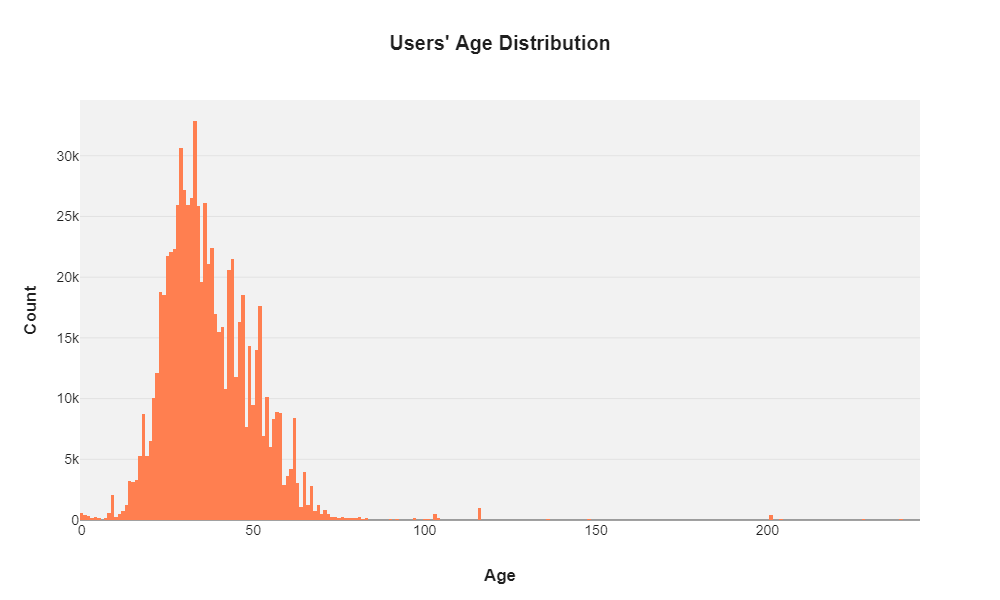

In [20]:
# Plotting the distribution of 'age'

fig_age = px.histogram(bookrec, x = 'age', title = "<b>Users' Age Distribution</b>", color_discrete_sequence = ['#FF7F50'])

fig_age.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Age</b>',
                      yaxis_title = '<b>Count</b>')

fig_age.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What are the top 10 locations with the highest number of individual ratings of the dataset?

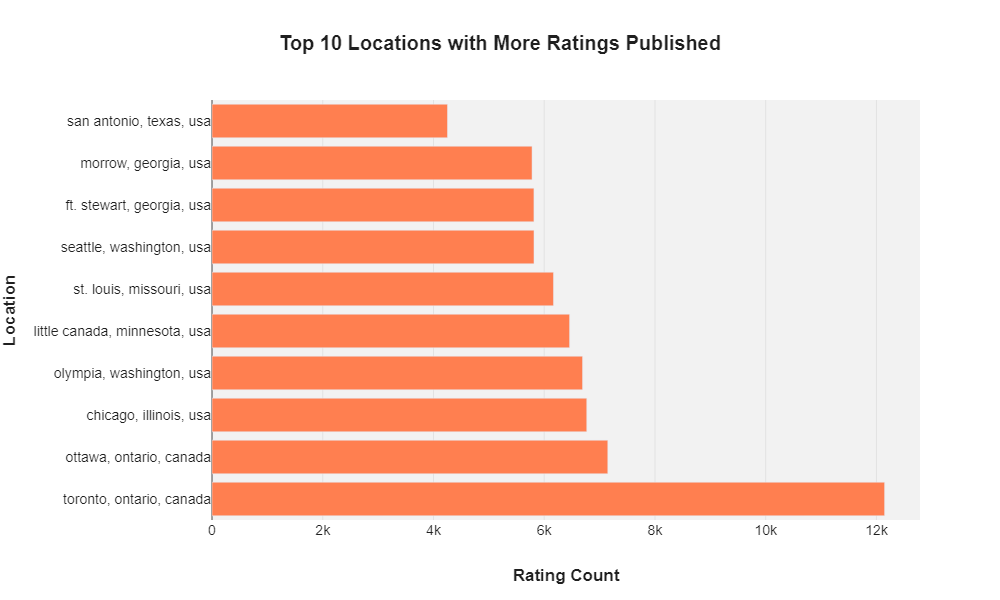

In [21]:
# Plotting the top 10 locations with more ratings published

fig_lmr = px.bar(bookrec.value_counts('location', ascending = False).head(10),
                 x = bookrec.value_counts('location', ascending = False).head(10),
                 y = bookrec.value_counts('location', ascending = False).head(10).index,
                 title = "<b>Top 10 Locations with More Ratings Published</b>",
                 color_discrete_sequence = ['#FF7F50'])

fig_lmr.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating Count</b>',
                      yaxis_title = '<b>Location</b>')

fig_lmr.update_yaxes(automargin = True, title_standoff = 10)

fig_lmr.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What are the top 10 book titles with the highest number of individual ratings of the dataset?

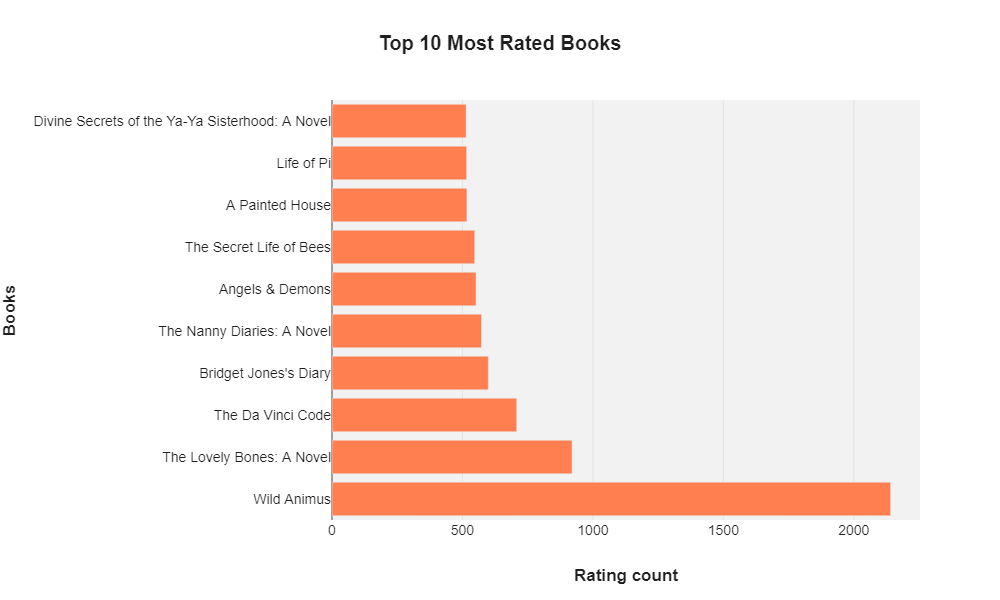

In [22]:
# Plotting the top 10 most rated books (by number of ratings)

fig_mrb = px.bar(bookrec.value_counts('book_title', ascending = False).head(10),
                 x = bookrec.value_counts('book_title', ascending = False).head(10),
                 y = bookrec.value_counts('book_title', ascending = False).head(10).index,
                 title = "<b>Top 10 Most Rated Books</b>",
                 color_discrete_sequence = ['#FF7F50'])

fig_mrb.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating count</b>',
                      yaxis_title = '<b>Books</b>')

fig_mrb.update_yaxes(automargin = True, title_standoff = 10)

fig_mrb.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What are the top 10 book authors with the highest number of individual ratings of the dataset?

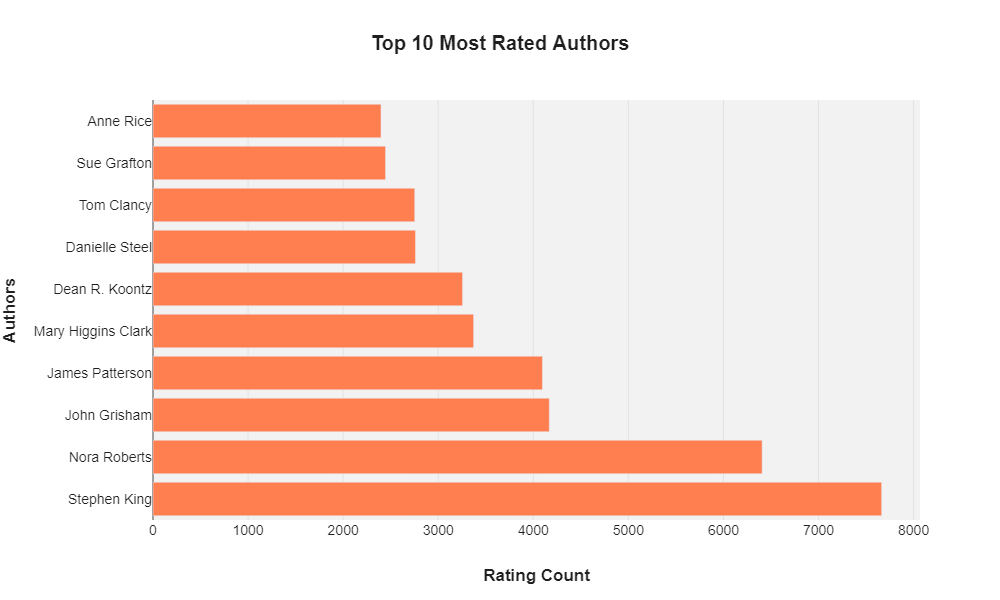

In [23]:
# Plotting the top 10 most rated authors (by number of ratings)

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

fig_mra = px.bar(bookrec.value_counts('book_author', ascending = False).head(10),
                 x = bookrec.value_counts('book_author', ascending = False).head(10),
                 y = bookrec.value_counts('book_author', ascending = False).head(10).index,
                 title = "<b>Top 10 Most Rated Authors</b>",
                 color_discrete_sequence = ['#FF7F50'])

fig_mra.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating Count</b>',
                      yaxis_title = '<b>Authors</b>')

fig_mra.update_yaxes(automargin = True, title_standoff = 10)

fig_mra.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What is the rating distribution of the dataset?

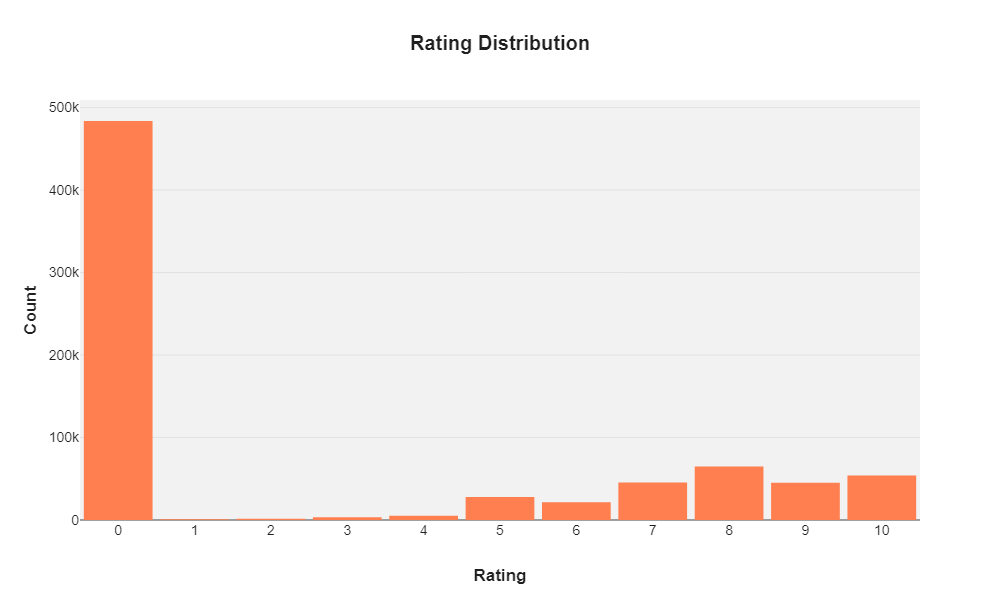

In [24]:
# Plotting the distribution of 'book_rating'

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

fig_br = px.histogram(bookrec, x = 'book_rating', title = "<b>Rating Distribution</b>",
                       color_discrete_sequence = ['#FF7F50'])

fig_br.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating</b>',
                      yaxis_title = '<b>Count</b>', xaxis = dict(tickmode = 'linear'), bargap = 0.1)

fig_br.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

### Creating a subdataset for users between 55 and 75 years old with ratings 6-10

In [25]:
# Creating a subdataset of 'users' with people around 65 years old (55 to 75)

bookrec_65 = bookrec[(bookrec['age'] >= 55) & (bookrec['age'] <= 75)]
bookrec_65

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l
49,114,57,"ligonier, pennsylvania, usa",0312953453,Blood Oath,David Morrell,1994,7,http://images.amazon.com/images/P/0312953453.0...
50,114,57,"ligonier, pennsylvania, usa",0446608653,The Alibi,Sandra Brown,2000,9,http://images.amazon.com/images/P/0446608653.0...
51,114,57,"ligonier, pennsylvania, usa",0446612545,The Beach House,James Patterson,2003,9,http://images.amazon.com/images/P/0446612545.0...
52,114,57,"ligonier, pennsylvania, usa",0446612618,A Kiss Remembered,Sandra Brown,2003,8,http://images.amazon.com/images/P/0446612618.0...
53,114,57,"ligonier, pennsylvania, usa",0451208080,The Short Forever,Stuart Woods,2003,8,http://images.amazon.com/images/P/0451208080.0...
...,...,...,...,...,...,...,...,...,...
840174,278815,56,"portland, oregon, usa",0316309079,Philistines at the Hedgerow : Passion and Prop...,Steven Gaines,1999,0,http://images.amazon.com/images/P/0316309079.0...
840178,278820,59,"ninety six, south carolina, usa",0399135790,Cold Fire,Dean R. Koontz,1991,3,http://images.amazon.com/images/P/0399135790.0...
840180,278832,62,"new smyrna beach, florida, usa",155874262X,Chicken Soup for the Soul (Chicken Soup for th...,Jack Canfield,1993,10,http://images.amazon.com/images/P/155874262X.0...
840181,278832,62,"new smyrna beach, florida, usa",1558745718,Chicken Soup for the Pet Lover's Soul (Chicken...,Jack Canfield,1998,10,http://images.amazon.com/images/P/1558745718.0...


In [26]:
# Dropping the ratings below 6

bookrec_65.drop(bookrec_65[bookrec_65['book_rating'] < 6].index, inplace = True)
bookrec_65.shape

(18008, 9)

In [27]:
# Checking the statistics of 'bookrec_65'

bookrec_65.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18008 entries, 49 to 840182
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      18008 non-null  int64 
 1   age          18008 non-null  int64 
 2   location     18008 non-null  object
 3   isbn         18008 non-null  object
 4   book_title   18008 non-null  object
 5   book_author  18008 non-null  object
 6   year_pub     18008 non-null  int64 
 7   book_rating  18008 non-null  int64 
 8   image_url_l  18008 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


### Creating the observations 'country' and 'geo_loc' from 'location'

In [28]:
# Creating a new variable 'country' based on the last information of the variable 'location'

bookrec_65['country'] = bookrec_65['location'].str.split(',').str[-1]
bookrec_65

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country
49,114,57,"ligonier, pennsylvania, usa",0312953453,Blood Oath,David Morrell,1994,7,http://images.amazon.com/images/P/0312953453.0...,usa
50,114,57,"ligonier, pennsylvania, usa",0446608653,The Alibi,Sandra Brown,2000,9,http://images.amazon.com/images/P/0446608653.0...,usa
51,114,57,"ligonier, pennsylvania, usa",0446612545,The Beach House,James Patterson,2003,9,http://images.amazon.com/images/P/0446612545.0...,usa
52,114,57,"ligonier, pennsylvania, usa",0446612618,A Kiss Remembered,Sandra Brown,2003,8,http://images.amazon.com/images/P/0446612618.0...,usa
53,114,57,"ligonier, pennsylvania, usa",0451208080,The Short Forever,Stuart Woods,2003,8,http://images.amazon.com/images/P/0451208080.0...,usa
...,...,...,...,...,...,...,...,...,...,...
840135,278713,63,"albuquerque, new mexico, usa",0670528951,Orson Welles,Barbara Leaming,1985,8,http://images.amazon.com/images/P/0670528951.0...,usa
840173,278807,66,"pollock pines, california, usa",0449223612,N Is for Noose,Sue Grafton,1999,10,http://images.amazon.com/images/P/0449223612.0...,usa
840180,278832,62,"new smyrna beach, florida, usa",155874262X,Chicken Soup for the Soul (Chicken Soup for th...,Jack Canfield,1993,10,http://images.amazon.com/images/P/155874262X.0...,usa
840181,278832,62,"new smyrna beach, florida, usa",1558745718,Chicken Soup for the Pet Lover's Soul (Chicken...,Jack Canfield,1998,10,http://images.amazon.com/images/P/1558745718.0...,usa


In [29]:
# Observing the total of unique entries for 'country'

bookrec_65['country'].nunique()

47

In [30]:
# Observing the unique entries for 'country'

bookrec_65['country'].unique()

array([' usa', ' canada', ' united kingdom', ' turkey', ' spain',
       ' new zealand', '', ' germany', ' brazil', ' india',
       ' netherlands', ' england', ' australia', ' finland', ' ireland',
       ' mexico', ' switzerland', ' portugal', ' austria', ' costa rica',
       ' sweden', ' polk', ' grenada', ' france', ' italy', ' poland',
       ' zimbabwe', ' china', ' zambia', ' malaysia', ' japan', ' israel',
       ' south africa', ' saudi arabia', ' france"', ' egypt', ' belgium',
       ' panama', ' denmark', ' tonga', ' philippines', ' argentina',
       ' united state', ' afghanistan', ' norway', ' iceland', ' tobago'],
      dtype=object)

In [31]:
# Removing quote marks and blank spaces from the observations in 'country'

bookrec_65['country'] = bookrec_65['country'].str.strip(' ."')
bookrec_65['country'].unique()

array(['usa', 'canada', 'united kingdom', 'turkey', 'spain',
       'new zealand', '', 'germany', 'brazil', 'india', 'netherlands',
       'england', 'australia', 'finland', 'ireland', 'mexico',
       'switzerland', 'portugal', 'austria', 'costa rica', 'sweden',
       'polk', 'grenada', 'france', 'italy', 'poland', 'zimbabwe',
       'china', 'zambia', 'malaysia', 'japan', 'israel', 'south africa',
       'saudi arabia', 'egypt', 'belgium', 'panama', 'denmark', 'tonga',
       'philippines', 'argentina', 'united state', 'afghanistan',
       'norway', 'iceland', 'tobago'], dtype=object)

### Cleaning observations that does not represent a country

In [32]:
# Creating a list of the unique values for 'country' to check if they are valid countries

country_list = list(bookrec_65['country'].sort_values().unique())
country_list = [element.upper() for element in country_list]

In [33]:
# Creating the function to check if the countries in country_list are valid

def country_name_check():
    pycntrylst = list(pc.countries)
    name = []
    common_name = []
    official_name = []
    invalid_countrynames = []
    
    for i in pycntrylst:
        name.append(i.name)
        if hasattr(i, 'common_name'):
            common_name.append(i.common_name)
        else:
            common_name.append('')
        if hasattr(i, 'official_name'):
            official_name.append(i.official_name)
        else:
            official_name.append('')
            
    for j in country_list:
        if j not in map(str.upper, name) and j not in map(str.upper, common_name) and j not in map(str.upper, official_name):
            invalid_countrynames.append(j)
            
    invalid_countrynames = sorted(list(set(invalid_countrynames)))
    
    return print(invalid_countrynames), print(), print('There are a total of ' + (
        str(len(invalid_countrynames)) + ' invalid countries in the dataset.'));

In [34]:
# Printing the list of invalid countries

country_name_check();

['ENGLAND', 'POLK', 'TOBAGO', 'UNITED STATE', 'USA']

There are a total of 5 invalid countries in the dataset.


In [35]:
# Checking why 'usa' is the list of invalid countries

pc.countries.search_fuzzy('usa')

[Country(alpha_2='US', alpha_3='USA', flag='🇺🇸', name='United States', numeric='840', official_name='United States of America'),
 Country(alpha_2='ID', alpha_3='IDN', flag='🇮🇩', name='Indonesia', numeric='360', official_name='Republic of Indonesia'),
 Country(alpha_2='AZ', alpha_3='AZE', flag='🇦🇿', name='Azerbaijan', numeric='031', official_name='Republic of Azerbaijan'),
 Country(alpha_2='PH', alpha_3='PHL', flag='🇵🇭', name='Philippines', numeric='608', official_name='Republic of the Philippines'),
 Country(alpha_2='TR', alpha_3='TUR', flag='🇹🇷', name='Turkey', numeric='792', official_name='Republic of Turkey'),
 Country(alpha_2='KR', alpha_3='KOR', common_name='South Korea', flag='🇰🇷', name='Korea, Republic of', numeric='410'),
 Country(alpha_2='OM', alpha_3='OMN', flag='🇴🇲', name='Oman', numeric='512', official_name='Sultanate of Oman'),
 Country(alpha_2='ZM', alpha_3='ZMB', flag='🇿🇲', name='Zambia', numeric='894', official_name='Republic of Zambia'),
 Country(alpha_2='EE', alpha_3=

In [36]:
# Checking the invalid entry 'england'

bookrec_65[(bookrec_65['country'] == 'england')].drop_duplicates('user_id')

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country
23058,10067,61,"watton, norfolk, england",0001360469,Babe Dressing,Mandy Stanley,1997,10,http://images.amazon.com/images/P/0001360469.0...,england


In [37]:
# Replacing 'england' with 'united kingdom'

bookrec_65['country'].replace(to_replace = 'england', value = 'united kingdom', inplace = True)

In [38]:
# Checking the invalid entry 'polk'

bookrec_65[(bookrec_65['country'] == 'polk')].drop_duplicates('user_id')

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country
87826,32725,64,"des moines, ia, polk",089526692X,God and Man at Yale: The Superstitions of \Aca...,William F. Buckley,1978,8,http://images.amazon.com/images/P/089526692X.0...,polk


In [39]:
# Replacing 'polk' with 'usa'

bookrec_65['country'].replace(to_replace = 'polk', value = 'usa', inplace = True)

In [40]:
# Checking the invalid entry 'tobago'

bookrec_65[(bookrec_65['country'] == 'tobago')].drop_duplicates('user_id')

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country
739822,242828,55,"pigeon point road, tobago, west indies, tobago",0671023284,SMARTER THAN YOU THINK: A REVOLUTIONARY APPROA...,Paul Loeb,1998,10,http://images.amazon.com/images/P/0671023284.0...,tobago


In [41]:
# Replacing 'tobago' with 'trinidad and tobago'

bookrec_65['country'].replace(to_replace = 'tobago', value = 'trinidad and tobago', inplace = True)

In [42]:
# Checking the invalid entry 'united state'

bookrec_65[(bookrec_65['country'] == 'united state')].drop_duplicates('user_id')

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country
552347,184401,55,"olympia, washington, united state",0001981625,The Sea of Tranquility,Mark Haddon,1996,8,http://images.amazon.com/images/P/0001981625.0...,united state


In [43]:
# Replacing 'united state' with 'usa'

bookrec_65['country'].replace(to_replace = 'united state', value = 'usa', inplace = True)

In [44]:
# Checking the observation ''

bookrec_65[bookrec_65['country'] == '']

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country
10746,5499,60,"lakeland, tennessee,",0060005556,"Last to Die (Grippando, James)",James Grippando,2003,10,http://images.amazon.com/images/P/0060005556.0...,
10747,5499,60,"lakeland, tennessee,",0060083956,Mr. Paradise: A Novel,Elmore Leonard,2004,7,http://images.amazon.com/images/P/0060083956.0...,
10748,5499,60,"lakeland, tennessee,",0060193883,A Bloodhound to Die For,Virginia Lanier,2003,6,http://images.amazon.com/images/P/0060193883.0...,
10749,5499,60,"lakeland, tennessee,",0060555513,The Last Goodbye,Reed Arvin,2004,10,http://images.amazon.com/images/P/0060555513.0...,
10750,5499,60,"lakeland, tennessee,",0060555653,The Polished Hoe,Austin Clarke,2003,7,http://images.amazon.com/images/P/0060555653.0...,
...,...,...,...,...,...,...,...,...,...,...
825266,273190,71,"coconut grove, ,",0967449804,Ghosts of Key West,David L. Sloan,1998,10,http://images.amazon.com/images/P/0967449804.0...,
825267,273190,71,"coconut grove, ,",1561642045,Key West Gardens and Their Stories,Janis Frawley-Holler,2000,10,http://images.amazon.com/images/P/1561642045.0...,
825268,273190,71,"coconut grove, ,",1563052377,All Around the World Cookbook,Sheila Lukins,1994,10,http://images.amazon.com/images/P/1563052377.0...,
825275,273190,71,"coconut grove, ,",1887655174,The Wisdom of the Midwest: Common Sense and Un...,Criswell Freeman,1997,10,http://images.amazon.com/images/P/1887655174.0...,


In [45]:
# Replacing the observation '' with the first part of the 'location'

bookrec_65['country'][bookrec_65['country'] == ''] = bookrec_65['location'][bookrec_65['country'] == ''].str.split(',').str[0]

In [46]:
# Observing the total of unique entries for 'country' - updated

bookrec_65['country'].nunique()

134

In [47]:
# Observing the unique entries for 'country' - updated

bookrec_65['country'].sort_values().unique()

array(['abington', 'afghanistan', 'ajijic', 'alabaster', 'aldergrove',
       'antelope', 'appleton', 'argentina', 'atchison', 'australia',
       'austria', 'baltimore', 'beaverton', 'belgium', 'belton',
       'berkeley', 'bethel', 'bloomer', 'bowdoin', 'brattleboro',
       'brazil', 'brighton', 'cambridge', 'canada', 'cedar rapids',
       'charleston', 'charlotte', 'cheriton', 'chicago', 'china',
       'cincinnati', 'coconut grove', 'colleyville', 'collierville',
       'concord', 'costa rica', 'crestwood', 'denmark', 'egypt',
       'enschede', 'ester', 'finland', 'forest grove', 'france', 'genova',
       'germany', 'gig harbor', 'grayslake', 'grenada', 'houma',
       'houston', 'huntington beach', 'iceland', 'india', 'ireland',
       'irvine', 'israel', 'italy', 'japan', 'kelowna',
       'kill devils hills', 'kitchener', 'lagrange', 'lakeland',
       'las cruces', 'leonidas', 'lexington', 'louisville', 'malaysia',
       'markham', 'mazieres-en-gatine', 'mercer island', 'm

In [48]:
# Updating the list of the unique values for 'country' to check if they are valid countries

country_list = list(bookrec_65['country'].sort_values().unique())
country_list = [element.upper() for element in country_list]

In [49]:
# Creating the function to check if the countries in country_list are valid

def country_name_check():
    pycntrylst = list(pc.countries)
    name = []
    common_name = []
    official_name = []
    invalid_countrynames = []
    
    for i in pycntrylst:
        name.append(i.name)
        if hasattr(i, 'common_name'):
            common_name.append(i.common_name)
        else:
            common_name.append('')
        if hasattr(i, 'official_name'):
            official_name.append(i.official_name)
        else:
            official_name.append('')
            
    for j in country_list:
        if j not in map(str.upper, name) and j not in map(str.upper, common_name) and j not in map(str.upper, official_name):
            invalid_countrynames.append(j)
            
    invalid_countrynames = sorted(list(set(invalid_countrynames)))
    
    return print(invalid_countrynames), print(), print('There are a total of ' + (
        str(len(invalid_countrynames)) + ' invalid countries in the dataset.'));

In [50]:
# Printing the list of invalid countries

country_name_check();

['ABINGTON', 'AJIJIC', 'ALABASTER', 'ALDERGROVE', 'ANTELOPE', 'APPLETON', 'ATCHISON', 'BALTIMORE', 'BEAVERTON', 'BELTON', 'BERKELEY', 'BETHEL', 'BLOOMER', 'BOWDOIN', 'BRATTLEBORO', 'BRIGHTON', 'CAMBRIDGE', 'CEDAR RAPIDS', 'CHARLESTON', 'CHARLOTTE', 'CHERITON', 'CHICAGO', 'CINCINNATI', 'COCONUT GROVE', 'COLLEYVILLE', 'COLLIERVILLE', 'CONCORD', 'CRESTWOOD', 'ENSCHEDE', 'ESTER', 'FOREST GROVE', 'GENOVA', 'GIG HARBOR', 'GRAYSLAKE', 'HOUMA', 'HOUSTON', 'HUNTINGTON BEACH', 'IRVINE', 'KELOWNA', 'KILL DEVILS HILLS', 'KITCHENER', 'LAGRANGE', 'LAKELAND', 'LAS CRUCES', 'LEONIDAS', 'LEXINGTON', 'LOUISVILLE', 'MARKHAM', 'MAZIERES-EN-GATINE', 'MERCER ISLAND', 'METAIRIE', 'MINNEAPOLIS', 'MOSCOW', 'NASHUA', 'NEW YORK CITY', 'NORTH FORT MYERS', 'OTTAWA', 'OXFORD', 'PALM BEACH', 'PALO ALTO', 'PEMBROKE PINES', 'PHARR', 'PORTALES', 'PORTLAND', 'PRICE', 'REDLANDS', 'S CHARLESTON', 'SAN DIEGO', 'SAN JOSÉ', 'SANTA BARBARA', 'SASKATOON', 'SEATTLE', 'SEVEN MILE BEACH', 'SIERRA VISTA', 'SKIPPACK', 'ST. LOUIS', 

In [51]:
# Creating a list with the invalid names, excluding 'usa', and putting them back to lowercase
# Their current spelling will not affect the geopy location

invalid_countries = ['ABINGTON', 'AJIJIC', 'ALABASTER', 'ALDERGROVE', 'ANTELOPE', 'APPLETON', 'ATCHISON', 'BALTIMORE',
                     'BEAVERTON', 'BELTON', 'BERKELEY', 'BETHEL', 'BLOOMER', 'BOWDOIN', 'BRATTLEBORO', 'BRIGHTON', 'CAMBRIDGE',
                     'CEDAR RAPIDS', 'CHARLESTON', 'CHARLOTTE', 'CHERITON', 'CHICAGO', 'CINCINNATI', 'COCONUT GROVE',
                     'COLLEYVILLE', 'COLLIERVILLE', 'CONCORD', 'CRESTWOOD', 'ENSCHEDE', 'ESTER', 'FOREST GROVE', 'GENOVA', 
                     'GIG HARBOR', 'GRAYSLAKE', 'HOUMA', 'HOUSTON', 'HUNTINGTON BEACH', 'IRVINE', 'KELOWNA', 
                     'KILL DEVILS HILLS', 'KITCHENER', 'LAGRANGE', 'LAKELAND', 'LAS CRUCES', 'LEONIDAS', 'LEXINGTON', 
                     'LOUISVILLE', 'MARKHAM', 'MAZIERES-EN-GATINE', 'MERCER ISLAND', 'METAIRIE', 'MINNEAPOLIS', 'MOSCOW', 
                     'NASHUA', 'NEW YORK CITY', 'NORTH FORT MYERS', 'OTTAWA', 'OXFORD', 'PALM BEACH', 'PALO ALTO', 
                     'PEMBROKE PINES', 'PHARR', 'PORTALES', 'PORTLAND', 'PRICE', 'REDLANDS', 'S CHARLESTON', 'SAN DIEGO', 
                     'SAN JOSÉ', 'SANTA BARBARA', 'SASKATOON', 'SEATTLE', 'SEVEN MILE BEACH', 'SIERRA VISTA', 'SKIPPACK', 
                     'ST. LOUIS', 'STEVENSVILLE', 'STORM LAKE', 'TIGARD', 'TOPEKA', 'TORONTO', 'TULSA', 'TUSTIN', 'VACAVILLE',
                     'VANCOUVER', 'WALLED LAKE', 'WALTHAM', 'WEST LINN', 'WESTMINSTER', 'WHITE BEAR LAKE', 'WOBURN', 'YUMA']

invalid_countries = [element.lower() for element in invalid_countries]

In [52]:
# Creating a column to filter the invalid values only

records = []
for L in bookrec_65['country']:
    if L in invalid_countries:
        records.append(L)
    else:
        record = ''
        records.append(record)

bookrec_65['invalid'] = records

In [53]:
# Observing the invalid values in the dataframe to check if they can be replaced manually or if they must be dropped
# First 33 observations

bookrec_65[(bookrec_65['invalid'] != '')].sort_values(by = 'invalid').drop_duplicates('user_id')[0:33]

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country,invalid
188046,67535,61,"abington, ,",0345413369,"The Subtle Knife (His Dark Materials, Book 2)",PHILIP PULLMAN,1998,10,http://images.amazon.com/images/P/0345413369.0...,abington,abington
407181,137068,57,"ajijic, jalisco,",0425120279,The Hunt for Red October,Tom Clancy,1990,7,http://images.amazon.com/images/P/0425120279.0...,ajijic,ajijic
680826,226556,58,"alabaster, ,",0671024248,Hearts In Atlantis,Stephen King,2000,7,http://images.amazon.com/images/P/0671024248.0...,alabaster,alabaster
469228,157547,67,"aldergrove, ,",0425098400,Celestial Navigation,Anne Tyler,1993,8,http://images.amazon.com/images/P/0425098400.0...,aldergrove,aldergrove
434880,147112,73,"antelope, ,",1551669013,Ask Anyone,Sherryl Woods,2002,9,http://images.amazon.com/images/P/1551669013.0...,antelope,antelope
552198,184305,64,"appleton, ,",0440213290,The Copper Beech,Maeve Binchy,1993,10,http://images.amazon.com/images/P/0440213290.0...,appleton,appleton
262646,92688,62,"atchison, ,",0440241073,The Summons,John Grisham,2002,8,http://images.amazon.com/images/P/0440241073.0...,atchison,atchison
242125,84941,57,"baltimore, ,",0449207269,Ride a Pale Horse,Helen MacInnes,1985,6,http://images.amazon.com/images/P/0449207269.0...,baltimore,baltimore
73791,28700,61,"beaverton,, ,",0140254544,A Light in the Window (The Mitford Years),Jan Karon,1996,10,http://images.amazon.com/images/P/0140254544.0...,beaverton,beaverton
476430,160899,65,"belton, ,",0440414806,Holes (Yearling Newbery),LOUIS SACHAR,2000,8,http://images.amazon.com/images/P/0440414806.0...,belton,belton


In [54]:
# Observing the invalid values in the dataframe to check if they can be replaced manually or if they must be dropped
# Second group of 33 observations

bookrec_65[(bookrec_65['invalid'] != '')].sort_values(by = 'invalid').drop_duplicates('user_id')[33:66]

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country,invalid
577549,193502,64,"grayslake, ,",0060502258,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,10,http://images.amazon.com/images/P/0060502258.0...,grayslake,grayslake
601753,199416,65,"houma, louisiana,",0671662236,Stone City: A Novel,Mitchell Smith,1990,7,http://images.amazon.com/images/P/0671662236.0...,houma,houma
51215,20458,65,"houma, louisiana,",074323748X,The Moment She Was Gone : A Novel,Evan Hunter,2002,7,http://images.amazon.com/images/P/074323748X.0...,houma,houma
628321,207835,57,"houston, ,",0425179885,The Devil's Code,John Sandford,2004,7,http://images.amazon.com/images/P/0425179885.0...,houston,houston
743988,244389,60,"houston, texas,",0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,7,http://images.amazon.com/images/P/0312195516.0...,houston,houston
320319,109180,60,"huntington beach, california,",0060172479,Staying Together: The Control Theory Guide to ...,William Glasser,1995,6,http://images.amazon.com/images/P/0060172479.0...,huntington beach,huntington beach
105895,37822,58,"irvine, ,",0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,8,http://images.amazon.com/images/P/0316666343.0...,irvine,irvine
378494,127765,60,"kelowna, ,",0517594994,Star Flight,Phyllis A. Whitney,1993,10,http://images.amazon.com/images/P/0517594994.0...,kelowna,kelowna
126704,46199,62,"kill devils hills, ,",0440236703,Tell No One,Harlan Coben,2002,8,http://images.amazon.com/images/P/0440236703.0...,kill devils hills,kill devils hills
373985,127003,75,"kitchener, ontario,",0821770667,Smuggler's Heart (Zebra Regency Romance),Jeanne Savery,2002,8,http://images.amazon.com/images/P/0821770667.0...,kitchener,kitchener


In [55]:
# Observing the invalid values in the dataframe to check if they can be replaced manually or if they must be dropped
# Last group of 32 observations

bookrec_65[(bookrec_65['invalid'] != '')].sort_values(by = 'invalid').drop_duplicates('user_id')[66:]

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country,invalid
267104,93639,64,"portland, ,",0805019367,"K Is for Killer (Grafton, Sue. Kinsey Millhone...",Sue Grafton,1994,7,http://images.amazon.com/images/P/0805019367.0...,portland,portland
650912,216088,66,"portland, ,",1873982100,The Limits of Vision,Robert Irwin,1997,9,http://images.amazon.com/images/P/1873982100.0...,portland,portland
791725,261320,74,"price, ,",0446611085,Suzanne's Diary for Nicholas,James Patterson,2003,10,http://images.amazon.com/images/P/0446611085.0...,price,price
110710,39476,72,"redlands, ,",0312978383,Winter Solstice,Rosamunde Pilcher,2001,10,http://images.amazon.com/images/P/0312978383.0...,redlands,redlands
654078,217292,75,"s charleston, ,",0874778875,"The Wonder of Boys: What Parents, Mentors and ...",Michael Gurian,1997,7,http://images.amazon.com/images/P/0874778875.0...,s charleston,s charleston
394699,132367,66,"san diego, california,",0446530387,Stone Kiss (Peter Decker &amp; Rina Lazarus No...,Faye Kellerman,2002,8,http://images.amazon.com/images/P/0446530387.0...,san diego,san diego
349222,117227,58,"san josé, san josé,",080410882X,Dinner at the Homesick Restaurant,Anne Tyler,1992,9,http://images.amazon.com/images/P/080410882X.0...,san josé,san josé
466433,156479,62,"santa barbara, ,",067976402X,Snow Falling on Cedars,David Guterson,1995,8,http://images.amazon.com/images/P/067976402X.0...,santa barbara,santa barbara
232608,81098,63,"saskatoon, ,",1550224492,A Chance for Life: The Suzanne Giroux Story,Suzanne Giroux,2001,6,http://images.amazon.com/images/P/1550224492.0...,saskatoon,saskatoon
200588,71223,62,"seattle, washington,",0425141551,Paper Doll,Robert B. Parker,1996,8,http://images.amazon.com/images/P/0425141551.0...,seattle,seattle


In [56]:
# Dropping observations that country could not be identified

# Information available in the column 'Location' was checked, when needed, at geotargit.com and google.com
# In case of location can be in more than one country, the row was dropped

#1
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 67535].index, inplace = True) # abington
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 147112].index, inplace = True) # antelope
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 84941].index, inplace = True) # baltimore
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 28700].index, inplace = True) # beaverton
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 160899].index, inplace = True) # belton
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 14007].index, inplace = True) # berkeley
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 170850].index, inplace = True) # bethel
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 247904].index, inplace = True) # brighton
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 41122].index, inplace = True) # cambridge
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 178458].index, inplace = True) # cheriton
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 46893].index, inplace = True) # cincinnati
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 197135].index, inplace = True) # ester
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 166357].index, inplace = True) # forest grove
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 194388].index, inplace = True) # genova

#2
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 207835].index, inplace = True) # houston
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 37822].index, inplace = True) # irvine
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 174692].index, inplace = True) # lagrange
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 247315].index, inplace = True) # las cruces
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 239696].index, inplace = True) # lexington
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 36798].index, inplace = True) # louisville
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 274361].index, inplace = True) # markham
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 73603].index, inplace = True) # mercer island
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 65939].index, inplace = True) # nashua
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 142670].index, inplace = True) # ottawa
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 237064].index, inplace = True) # oxford
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 84112].index, inplace = True) # palm beach
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 169496].index, inplace = True) # palo alto

#3
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 93639].index, inplace = True) # portland
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 216088].index, inplace = True) # portland
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 261320].index, inplace = True) # price
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 39476].index, inplace = True) # redlands
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 217292].index, inplace = True) # s charleston
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 117227].index, inplace = True) # san josé, san josé
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 156479].index, inplace = True) # santa barbara
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 84038].index, inplace = True) # seven mile beach
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 128639].index, inplace = True) # st. louis
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 54569].index, inplace = True) # storm lake
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 216114].index, inplace = True) # topeka
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 134119].index, inplace = True) # toronto
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 26082].index, inplace = True) # vancouver
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 142051].index, inplace = True) # vancouver
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 228913].index, inplace = True) # waltham
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 183145].index, inplace = True) # woburn
bookrec_65.drop(bookrec_65[bookrec_65['user_id'] == 158925].index, inplace = True) # yuma

Entries for 44 invalid country names were dropped.

In [57]:
# Replacing observations that country could be identified

# Information available in the column 'Location' was checked, when needed, at geotargit.com and google.com
# If the location could only be identified in one country, the respective observation for 'Country' was updated

#1
bookrec_65['country'].replace(to_replace = 'ajijic', value = 'mexico', inplace = True)
bookrec_65['country'].replace(to_replace = 'alabaster', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'aldergrove', value = 'canada', inplace = True)
bookrec_65['country'].replace(to_replace = 'appleton', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'atchison', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'bloomer', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'bowdoin', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'brattleboro', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'cedar rapids', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'charleston', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'charlotte', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'chicago', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'coconut grove', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'colleyville', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'collierville', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'concord', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'crestwood', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'enschede', value = 'netherlands', inplace = True)
bookrec_65['country'].replace(to_replace = 'gig harbor', value = 'usa', inplace = True)

#2
bookrec_65['country'].replace(to_replace = 'grayslake', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'houma', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'houston', value = 'usa', inplace = True) # houston, texas
bookrec_65['country'].replace(to_replace = 'huntington beach', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'kelowna', value = 'canada', inplace = True)
bookrec_65['country'].replace(to_replace = 'kill devils hills', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'kitchener', value = 'canada', inplace = True)
bookrec_65['country'].replace(to_replace = 'lakeland', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'leonidas', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'mazieres-en-gatine', value = 'france', inplace = True)
bookrec_65['country'].replace(to_replace = 'metairie', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'minneapolis', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'moscow', value = 'usa', inplace = True) # moscow, idaho
bookrec_65['country'].replace(to_replace = 'new york city', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'north fort myers', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'pembroke pines', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'pharr', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'portales', value = 'usa', inplace = True)

#3
bookrec_65['country'].replace(to_replace = 'san diego', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'saskatoon', value = 'canada', inplace = True)
bookrec_65['country'].replace(to_replace = 'seattle', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'sierra vista', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'skippack', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'stevensville', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'tigard', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'tulsa', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'tustin', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'vacaville', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'walled lake', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'west linn', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'westminster', value = 'usa', inplace = True)
bookrec_65['country'].replace(to_replace = 'white bear lake', value = 'usa', inplace = True)

Entries for 51 invalid country names were replaced with a valid country name.

In [58]:
# Creating a new the list of the unique values for 'country' to check if they are valid countries

country_list2 = list(bookrec_65['country'].sort_values().unique())
country_list2 = [element.upper() for element in country_list2]

In [59]:
# Creating the function to check if the countries in country_list2 are valid

def country_name_check2():
    pycntrylst = list(pc.countries)
    name = []
    common_name = []
    official_name = []
    invalid_countrynames = []
    
    for i in pycntrylst:
        name.append(i.name)
        if hasattr(i, 'common_name'):
            common_name.append(i.common_name)
        else:
            common_name.append('')
        if hasattr(i, 'official_name'):
            official_name.append(i.official_name)
        else:
            official_name.append('')
            
    for j in country_list2:
        if j not in map(str.upper, name) and j not in map(str.upper, common_name) and j not in map(str.upper, official_name):
            invalid_countrynames.append(j)
            
    invalid_countrynames = sorted(list(set(invalid_countrynames)))
    
    return print(invalid_countrynames), print(), print('There are a total of ' + (
        str(len(invalid_countrynames)) + ' invalid countries in the dataset.'));

In [60]:
# Checking the list of invalid countries

country_name_check2();

['USA']

There are a total of 1 invalid countries in the dataset.


In [61]:
# Observing the number of unique entries for 'country' after cleaning the data

bookrec_65['country'].nunique()

42

In [62]:
# Observing the unique entries for 'country' after cleaning the data

bookrec_65['country'].unique()

array(['usa', 'canada', 'united kingdom', 'turkey', 'spain',
       'new zealand', 'germany', 'brazil', 'india', 'netherlands',
       'australia', 'finland', 'ireland', 'mexico', 'switzerland',
       'portugal', 'austria', 'costa rica', 'sweden', 'grenada', 'france',
       'italy', 'poland', 'zimbabwe', 'china', 'zambia', 'malaysia',
       'japan', 'israel', 'south africa', 'saudi arabia', 'egypt',
       'belgium', 'panama', 'denmark', 'tonga', 'philippines',
       'argentina', 'afghanistan', 'norway', 'iceland',
       'trinidad and tobago'], dtype=object)

In [63]:
# Creating the locator that holds the Geocoding service Nominatim

locator = Nominatim(user_agent = 'geopy')
location = locator.geocode('spain', language = 'en')
location.point, location.latitude, location.longitude

(Point(39.3260685, -4.8379791, 0.0), 39.3260685, -4.8379791)

In [64]:
# Creating a new column 'geo_loc' with the geo location for the respective unique 'country'
# Obtaining the geo location for the unique countries makes this code be much less time consuming
# Time reduction from over 2h to a few seconds

bookrec_65['geo_loc'] = bookrec_65['country'].drop_duplicates().apply(locator.geocode, language = 'en')
bookrec_65

,user_id,age,location,isbn,book_title,book_author,year_pub,book_rating,image_url_l,country,invalid,geo_loc
49,114,57,"ligonier, pennsylvania, usa",0312953453,Blood Oath,David Morrell,1994,7,http://images.amazon.com/images/P/0312953453.0...,usa,,"(United States, (39.7837304, -100.445882))"
50,114,57,"ligonier, pennsylvania, usa",0446608653,The Alibi,Sandra Brown,2000,9,http://images.amazon.com/images/P/0446608653.0...,usa,,NaN
51,114,57,"ligonier, pennsylvania, usa",0446612545,The Beach House,James Patterson,2003,9,http://images.amazon.com/images/P/0446612545.0...,usa,,NaN
52,114,57,"ligonier, pennsylvania, usa",0446612618,A Kiss Remembered,Sandra Brown,2003,8,http://images.amazon.com/images/P/0446612618.0...,usa,,NaN
53,114,57,"ligonier, pennsylvania, usa",0451208080,The Short Forever,Stuart Woods,2003,8,http://images.amazon.com/images/P/0451208080.0...,usa,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
840135,278713,63,"albuquerque, new mexico, usa",0670528951,Orson Welles,Barbara Leaming,1985,8,http://images.amazon.com/images/P/0670528951.0...,usa,,NaN
840173,278807,66,"pollock pines, california, usa",0449223612,N Is for Noose,Sue Grafton,1999,10,http://images.amazon.com/images/P/0449223612.0...,usa,,NaN
840180,278832,62,"new smyrna beach, florida, usa",155874262X,Chicken Soup for the Soul (Chicken Soup for th...,Jack Canfield,1993,10,http://images.amazon.com/images/P/155874262X.0...,usa,,NaN
840181,278832,62,"new smyrna beach, florida, usa",1558745718,Chicken Soup for the Pet Lover's Soul (Chicken...,Jack Canfield,1998,10,http://images.amazon.com/images/P/1558745718.0...,usa,,NaN


In [65]:
# Dropping the columns 'location' and 'invalid', as only 'country' will be used
# Rearranging the order of the remaining columns
# Reseting the index

bookrec_65.drop(columns = ['location', 'invalid'], inplace = True)
bookrec_65 = bookrec_65[['user_id', 'age', 'country', 'geo_loc', 'isbn', 'book_title', 'book_author', 'year_pub', 'book_rating', 
                         'image_url_l']]
bookrec_65.reset_index(drop = True, inplace = True)

bookrec_65

,user_id,age,country,geo_loc,isbn,book_title,book_author,year_pub,book_rating,image_url_l
0,114,57,usa,"(United States, (39.7837304, -100.445882))",0312953453,Blood Oath,David Morrell,1994,7,http://images.amazon.com/images/P/0312953453.0...
1,114,57,usa,NaN,0446608653,The Alibi,Sandra Brown,2000,9,http://images.amazon.com/images/P/0446608653.0...
2,114,57,usa,NaN,0446612545,The Beach House,James Patterson,2003,9,http://images.amazon.com/images/P/0446612545.0...
3,114,57,usa,NaN,0446612618,A Kiss Remembered,Sandra Brown,2003,8,http://images.amazon.com/images/P/0446612618.0...
4,114,57,usa,NaN,0451208080,The Short Forever,Stuart Woods,2003,8,http://images.amazon.com/images/P/0451208080.0...
...,...,...,...,...,...,...,...,...,...,...
17865,278713,63,usa,NaN,0670528951,Orson Welles,Barbara Leaming,1985,8,http://images.amazon.com/images/P/0670528951.0...
17866,278807,66,usa,NaN,0449223612,N Is for Noose,Sue Grafton,1999,10,http://images.amazon.com/images/P/0449223612.0...
17867,278832,62,usa,NaN,155874262X,Chicken Soup for the Soul (Chicken Soup for th...,Jack Canfield,1993,10,http://images.amazon.com/images/P/155874262X.0...
17868,278832,62,usa,NaN,1558745718,Chicken Soup for the Pet Lover's Soul (Chicken...,Jack Canfield,1998,10,http://images.amazon.com/images/P/1558745718.0...


In [66]:
# Observing the unique entries for 'geo_loc'

bookrec_65[bookrec_65['geo_loc'].notnull()]

,user_id,age,country,geo_loc,isbn,book_title,book_author,year_pub,book_rating,image_url_l
0,114,57,usa,"(United States, (39.7837304, -100.445882))",0312953453,Blood Oath,David Morrell,1994,7,http://images.amazon.com/images/P/0312953453.0...
9,362,63,canada,"(Canada, (61.0666922, -107.991707))",0446606197,Killer Market (Deborah Knott Mysteries (Paperb...,Margaret Maron,1999,7,http://images.amazon.com/images/P/0446606197.0...
36,2305,71,united kingdom,"(United Kingdom, (54.7023545, -3.2765753))",0609600567,Road Rage,Ruth Rendell,1997,7,http://images.amazon.com/images/P/0609600567.0...
148,4508,64,turkey,"(Turkey, (38.9597594, 34.9249653))",1412014050,Natural Affinities,James Ryan,2004,10,http://images.amazon.com/images/P/1412014050.0...
153,5231,56,spain,"(Spain, (39.3260685, -4.8379791))",8467004118,Irak: El Estado Incierto,Eric Frattini,2003,7,http://images.amazon.com/images/P/8467004118.0...
154,5351,74,new zealand,"(New Zealand, (-41.5000831, 172.8344077))",0330253565,Honourable Schoolboy,John Le Carre,0,7,http://images.amazon.com/images/P/0330253565.0...
220,6410,61,germany,"(Germany, (51.1638175, 10.4478313))",3257230915,Tagebuch 1920.,Isaak Babel,1998,7,http://images.amazon.com/images/P/3257230915.0...
259,7680,57,brazil,"(Brazil, (-10.3333333, -53.2))",0425166392,Guilty Pleasures,Lawrence Sanders,1998,9,http://images.amazon.com/images/P/0425166392.0...
267,8546,69,india,"(India, (22.3511148, 78.6677428))",8171670407,Inscrutable Americans,Mathur Anurag,1996,8,http://images.amazon.com/images/P/8171670407.0...
270,8699,72,netherlands,"(Netherlands, (52.2434979, 5.6343227))",0449215156,Mrs. Pollifax and the Golden Triangle,Dorothy Gilman,1991,7,http://images.amazon.com/images/P/0449215156.0...


In [67]:
# Replacing the 'NaN' values in 'geo_loc' based on the unique value obtained for each 'country'

bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'usa', '39.7837304, -100.445882', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'canada', '61.0666922, -107.991707', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'united kingdom', '54.7023545, -3.2765753', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'turkey', '38.9597594, 34.9249653', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'spain', '39.3260685, -4.8379791', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'new zealand', '-41.5000831, 172.8344077', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'germany', '51.1638175, 10.4478313', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'brazil', '-10.3333333, -53.2', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'india', '22.3511148, 78.6677428', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'netherlands', '52.2434979, 5.6343227', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'australia', '-24.7761086, 134.755', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'finland', '63.2467777, 25.9209164', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'ireland', '52.865196, -7.9794599', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'mexico', '23.6585116, -102.0077097', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'switzerland', '46.7985624, 8.2319736', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'portugal', '39.6621648, -8.1353519', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'austria', '47.59397, 14.12456', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'costa rica', '10.2735633, -84.0739102', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'sweden', '59.6749712, 14.5208584', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'grenada', '12.1360374, -61.6904045', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'france', '46.603354, 1.8883335', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'italy', '42.6384261, 12.674297', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'poland', '52.215933, 19.134422', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'zimbabwe', '-18.4554963, 29.7468414', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'china', '35.000074, 104.999927', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'zambia', '-14.5189121, 27.5589884', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'malaysia', '4.5693754, 102.2656823', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'japan', '36.5748441, 139.2394179', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'israel', '30.8124247, 34.8594762', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'south africa', '-28.8166236, 24.991639', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'saudi arabia', '25.6242618, 42.3528328', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'egypt', '26.2540493, 29.2675469', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'belgium', '50.6402809, 4.6667145', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'panama', '8.559559, -81.1308434', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'denmark', '55.670249, 10.3333283', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'tonga', '-19.9160819, -175.202642', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'philippines', '12.7503486, 122.7312101', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'argentina', '-34.9964963, -64.9672817', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'afghanistan', '33.7680065, 66.2385139', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'norway', '60.5000209, 9.0999715', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'iceland', '64.9841821, -18.1059013', inplace = True)
bookrec_65['geo_loc'].mask(bookrec_65['country'] == 'trinidad and tobago', '10.7466905, -61.0840075', inplace = True)

In [68]:
# Creating the columns for latitude and longitude from 'geo_loc'

bookrec_65[['lat', 'long']] = bookrec_65['geo_loc'].str.split(',', expand = True)
bookrec_65

,user_id,age,country,geo_loc,isbn,book_title,book_author,year_pub,book_rating,image_url_l,lat,long
0,114,57,usa,"39.7837304, -100.445882",0312953453,Blood Oath,David Morrell,1994,7,http://images.amazon.com/images/P/0312953453.0...,39.7837304,-100.445882
1,114,57,usa,"39.7837304, -100.445882",0446608653,The Alibi,Sandra Brown,2000,9,http://images.amazon.com/images/P/0446608653.0...,39.7837304,-100.445882
2,114,57,usa,"39.7837304, -100.445882",0446612545,The Beach House,James Patterson,2003,9,http://images.amazon.com/images/P/0446612545.0...,39.7837304,-100.445882
3,114,57,usa,"39.7837304, -100.445882",0446612618,A Kiss Remembered,Sandra Brown,2003,8,http://images.amazon.com/images/P/0446612618.0...,39.7837304,-100.445882
4,114,57,usa,"39.7837304, -100.445882",0451208080,The Short Forever,Stuart Woods,2003,8,http://images.amazon.com/images/P/0451208080.0...,39.7837304,-100.445882
...,...,...,...,...,...,...,...,...,...,...,...,...
17865,278713,63,usa,"39.7837304, -100.445882",0670528951,Orson Welles,Barbara Leaming,1985,8,http://images.amazon.com/images/P/0670528951.0...,39.7837304,-100.445882
17866,278807,66,usa,"39.7837304, -100.445882",0449223612,N Is for Noose,Sue Grafton,1999,10,http://images.amazon.com/images/P/0449223612.0...,39.7837304,-100.445882
17867,278832,62,usa,"39.7837304, -100.445882",155874262X,Chicken Soup for the Soul (Chicken Soup for th...,Jack Canfield,1993,10,http://images.amazon.com/images/P/155874262X.0...,39.7837304,-100.445882
17868,278832,62,usa,"39.7837304, -100.445882",1558745718,Chicken Soup for the Pet Lover's Soul (Chicken...,Jack Canfield,1998,10,http://images.amazon.com/images/P/1558745718.0...,39.7837304,-100.445882


In [69]:
# Checking missing values for the dataset 'bookrec_65'

print('There are a total of ' + (str(bookrec_65.isna().sum().sum()) + ' missing values in the dataset.'))

There are a total of 0 missing values in the dataset.


In [70]:
# Rearranging the order of the columns to put the all information about location together

bookrec_65 = bookrec_65[['user_id', 'age', 'country', 'geo_loc', 'lat', 'long',
                         'isbn', 'book_title', 'book_author', 'year_pub', 'book_rating', 'image_url_l']]
bookrec_65.head()

,user_id,age,country,geo_loc,lat,long,isbn,book_title,book_author,year_pub,book_rating,image_url_l
0,114,57,usa,"39.7837304, -100.445882",39.7837304,-100.445882,0312953453,Blood Oath,David Morrell,1994,7,http://images.amazon.com/images/P/0312953453.0...
1,114,57,usa,"39.7837304, -100.445882",39.7837304,-100.445882,0446608653,The Alibi,Sandra Brown,2000,9,http://images.amazon.com/images/P/0446608653.0...
2,114,57,usa,"39.7837304, -100.445882",39.7837304,-100.445882,0446612545,The Beach House,James Patterson,2003,9,http://images.amazon.com/images/P/0446612545.0...
3,114,57,usa,"39.7837304, -100.445882",39.7837304,-100.445882,0446612618,A Kiss Remembered,Sandra Brown,2003,8,http://images.amazon.com/images/P/0446612618.0...
4,114,57,usa,"39.7837304, -100.445882",39.7837304,-100.445882,0451208080,The Short Forever,Stuart Woods,2003,8,http://images.amazon.com/images/P/0451208080.0...


In [71]:
# Converting columns 'lat' and 'long' to float64 dtype

bookrec_65['lat'] = bookrec_65['lat'].astype('float64')
bookrec_65['long'] = bookrec_65['long'].astype('float64')

#### What is the age distribution of the subdataset?

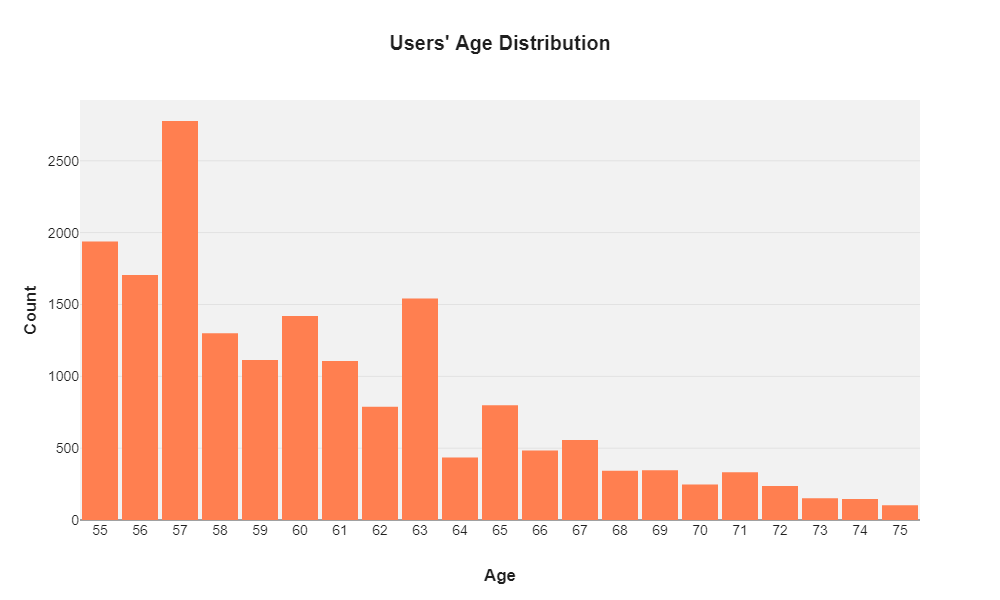

In [72]:
# Plotting the distribution of 'age'

fig_age = px.histogram(bookrec_65, x = 'age', title = "<b>Users' Age Distribution</b>", color_discrete_sequence = ['#FF7F50'])

fig_age.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Age</b>',
                      yaxis_title = '<b>Count</b>', xaxis = dict(tickmode = 'linear'), bargap = 0.1)

fig_age.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What are the top 10 countries with the highest number of individual ratings of the subdataset?

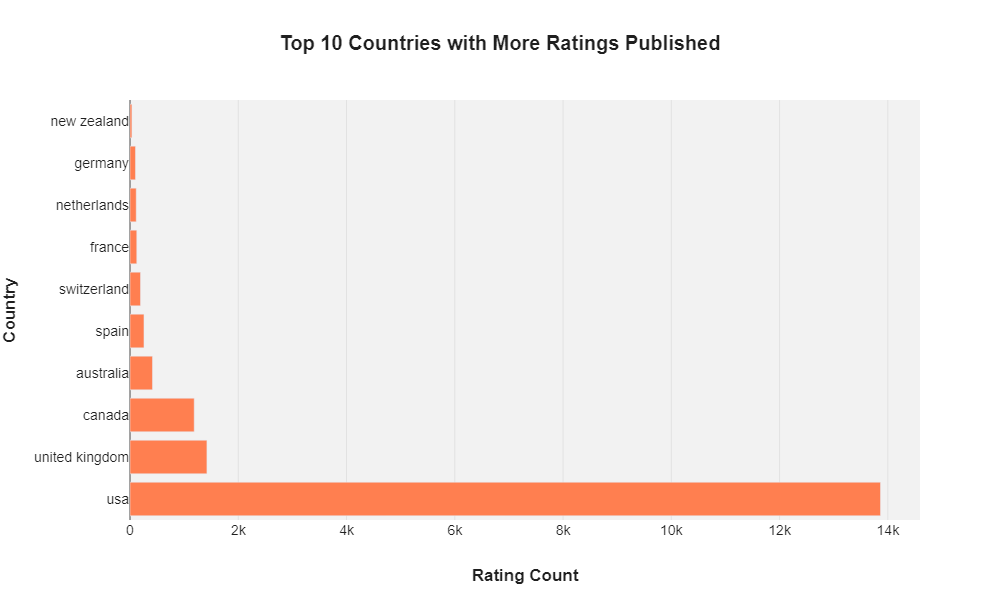

In [73]:
# Plotting the top 10 countries with more ratings published

fig_lmr = px.bar(bookrec_65.value_counts('country', ascending = False).head(10),
                 x = bookrec_65.value_counts('country', ascending = False).head(10),
                 y = bookrec_65.value_counts('country', ascending = False).head(10).index,
                 title = "<b>Top 10 Countries with More Ratings Published</b>",
                 color_discrete_sequence = ['#FF7F50'])

fig_lmr.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating Count</b>',
                      yaxis_title = '<b>Country</b>')

fig_lmr.update_yaxes(automargin = True, title_standoff = 10)

fig_lmr.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What are the top 10 book titles with the highest number of individual ratings of the subdataset?

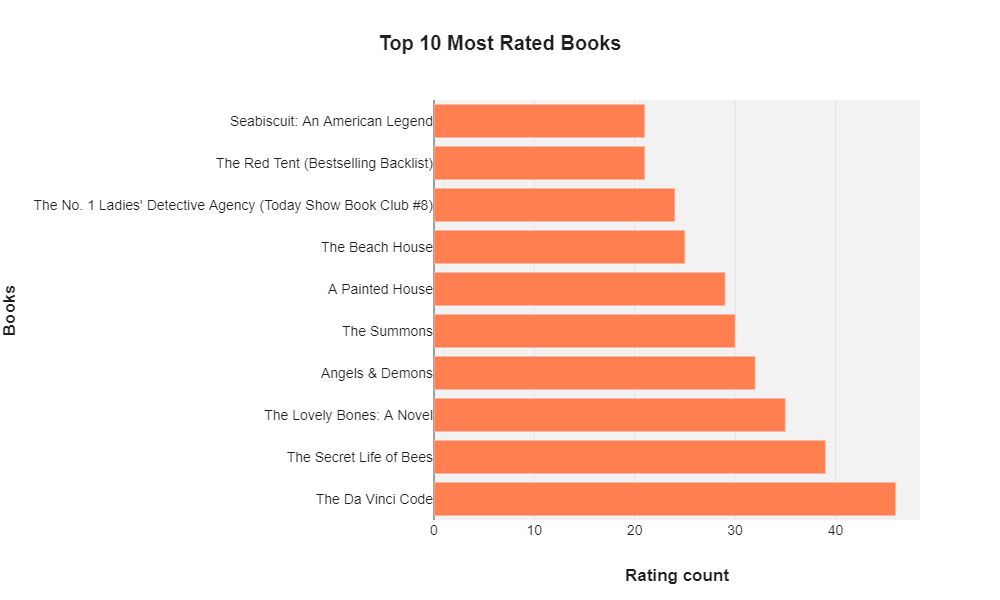

In [74]:
# Plotting the top 10 most rated books (by number of ratings)

fig_mrb = px.bar(bookrec.value_counts('book_title', ascending = False).head(10),
                 x = bookrec_65.value_counts('book_title', ascending = False).head(10),
                 y = bookrec_65.value_counts('book_title', ascending = False).head(10).index,
                 title = "<b>Top 10 Most Rated Books</b>",
                 color_discrete_sequence = ['#FF7F50'])

fig_mrb.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating count</b>',
                      yaxis_title = '<b>Books</b>')

fig_mrb.update_yaxes(automargin = True, title_standoff = 10)

fig_mrb.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What are the top 10 book authors with the highest number of individual ratings of the subdataset?

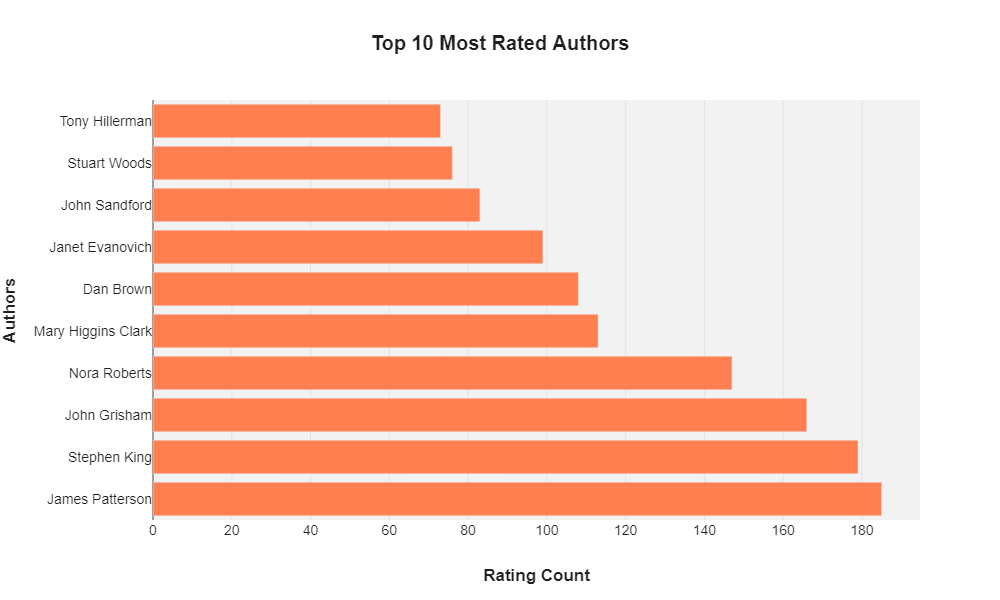

In [75]:
# Plotting the top 10 most rated authors (by number of ratings)

fig_mra = px.bar(bookrec_65.value_counts('book_author', ascending = False).head(10),
                 x = bookrec_65.value_counts('book_author', ascending = False).head(10),
                 y = bookrec_65.value_counts('book_author', ascending = False).head(10).index,
                 title = "<b>Top 10 Most Rated Authors</b>",
                 color_discrete_sequence = ['#FF7F50'])

fig_mra.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating Count</b>',
                      yaxis_title = '<b>Authors</b>')

fig_mra.update_yaxes(automargin = True, title_standoff = 10)

fig_mra.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

#### What is the rating distribution of the subdataset?

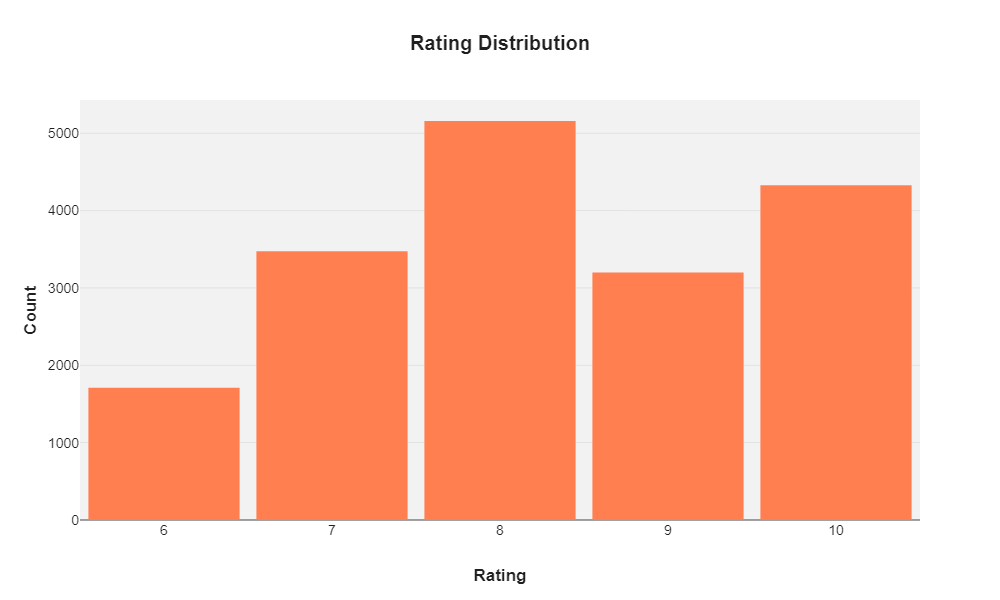

In [76]:
# Plotting the distribution of 'book_rating'

fig_br = px.histogram(bookrec_65, x = 'book_rating', title = "<b>Rating Distribution</b>",
                       color_discrete_sequence = ['#FF7F50'])

fig_br.update_layout(height = 600, width = 1000, template = custom_template, xaxis_title = '<b>Rating</b>',
                      yaxis_title = '<b>Count</b>', xaxis = dict(tickmode = 'linear'), bargap = 0.1)

fig_br.show('png') # renderer set to png only for displaying this plot on github as normal interactive plot is not displayed

### Creating an interactive map

In [77]:
# Creating the widget for selection of number of observations

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

style = {'description_width': 'initial'}

limit = widgets.IntSlider(value = 100, min = 0, max = 1000, step = 10, description = 'Number of ratings:', disabled = False,
                          style = style, layout = Layout(width = '95%'), display = 'flex')

def update_df_length(limit):
    
    df = bookrec_65.copy()
    df = df.iloc[0:limit, :]
    
# Creating the widget for country selection

df = bookrec_65.copy()
unique_countries = df.country.sort_values().unique()
unique_countries = [element.upper() for element in unique_countries]

country = widgets.SelectMultiple(options = unique_countries, value = ['USA'], description = 'Country',
                                 disabled = False, layout = Layout(width = '45%', height = '80px', display = 'flex'))



# Creating the widget for rating selection

unique_rating = df.book_rating.sort_values().unique()

rating = widgets.SelectMultiple(options = unique_rating.tolist(), value = [10], description = 'Rating', disabled = False,
                                style = style, layout = Layout(width = '45%', height = '80px', display = 'flex'))

In [78]:
# Designing the popup for the map

def popup_html(row):
    
    i = row
    df = bookrec_65.copy()
    
    country_html = str(df['country'].iloc[i]).title() 
    book_html = df['book_title'].iloc[i]
    rating_html = df['book_rating'].iloc[i]
    cover_html = df['image_url_l'].iloc[i] 

    left_col_color = '#404040'
    right_col_color = '#D3D3D3'

    html = """
    <!DOCTYPE html>
    <html>
    <center><img src = \"""" + cover_html + """\" alt = "logo" width=100 ></center>
    <center> <table style = "height: 150px; width: 250px;">
    <tbody>
    <tr>
    <td style="background-color: """ + left_col_color + """;"><span style="color: #ffffff;"> Country </span></td>
    <td style="width: 200px;background-color: """ + right_col_color + """;">{}</td>""".format(country_html) + """</td>
    </tr>
    <tr>
    <td style="background-color: """ + left_col_color + """;"><span style="color: #ffffff;"> Book </span></td>
    <td style="width: 200px;background-color: """ + right_col_color + """;">{}</td>""".format(book_html) + """
    </tr>
    <tr>
    <td style="background-color: """ + left_col_color + """;"><span style="color: #ffffff;"> Rating </span></td>
    <td style="width: 200px;background-color: """ + right_col_color + """;">{}</td>""".format(rating_html) + """
    </tr>
    </tbody>
    </table></center>
    </html>
    """
    return html

In [79]:
# Creating the function for the map

def updated_map(country, rating, limit):
    
    df = bookrec_65.copy()
    df = df.sample(5000) # getting a random sample of the dataset
    df = df.iloc[0:limit, :]
    df_country = df.loc[df['country'] == country]
    df_rating = df.loc[df['book_rating'] == rating]
    
    # Designing the map

    # Creating the map base
    book_map = folium.Map(location = [39.3260685, -4.8379791], zoom_start = 1.5)

    # Clustering datapoints
    point = plugins.MarkerCluster().add_to(book_map)

    # Set up the colours based rating
    purpose_colour = {6:'gray', 7:'gray', 8:'gray', 9:'gray', 10:'orange'}

    # Looping through each row in the dataframe
    for i, row in df_rating.iterrows():
    
        try:
            icon_color = purpose_colour[row['book_rating']]
        except:
            icon_color = 'gray'
    
        # Add each row to the map
        folium.Marker(location = [row['lat'], row['long']],
                      popup = folium.Popup(folium.Html(popup_html(i), script = True)), 
                      icon = folium.Icon(icon = 'book', prefix = 'fa', icon_color = 'white', color = icon_color)).add_to(point)
    
    # Showing map
    display(book_map)

In [80]:
# Plotting the interactive map
# Displaying an image below as output is not shown on github

interactive_plot = interactive(updated_map, country = country, rating = rating, limit = limit)
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow = 'row wrap'))
output = interactive_plot.children[-1]

output.layout.height = '500px'
display(VBox([controls, output]))

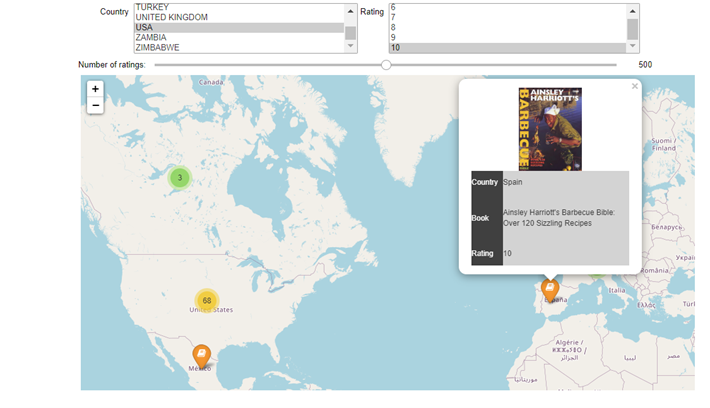

## Developing the recommendation systems

### Item-Based with Demographics

In [81]:
# Creating the item-based recommendation system

def item_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in bookrec_65['book_title'].values:
    
        rating_counts = pd.DataFrame(bookrec_65['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] < 10].index
        common_books = bookrec_65[~bookrec_65['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('\033[1m' + 'There are no recommendations for this book. Try:' + '\033[0m' '\n')
            print('{}'.format(random[0]))
            print('{}'.format(random[1]))
        
        else:
            user_book_df = common_books.pivot_table(index = ['user_id'], columns = ['book_title'], values = 'book_rating')
            book = user_book_df[book_title]
            recom_data = pd.DataFrame(user_book_df.corrwith(book). \
                                      sort_values(ascending = False)).reset_index(drop = False)
            
            if book_title in [book for book in recom_data['book_title']]:
                recom_data = recom_data.drop(recom_data[recom_data['book_title'] == book_title].index[0])
                
            low_rating = []
            for i in recom_data['book_title']:
                if bookrec_65[bookrec_65['book_title'] == i]['book_rating'].mean() < 7:
                    low_rating.append(i)
                    
            if recom_data.shape[0] - len(low_rating) >= 7:
                recom_data = recom_data[~recom_data['book_title'].isin(low_rating)]
            
            recom_data = recom_data[0:5]    
            recom_data.columns = ['book_title', 'corr']
            
            fig, axs = plt.subplots(1, 5, figsize  = (20, 5), facecolor = '#f2f2f2')
            fig.suptitle('You may also like these books', size = 22, weight = 'bold')

            for i in range(len(recom_data['book_title'].tolist())):
                
                url = bookrec_65.loc[bookrec_65['book_title'] == recom_data['book_title'].tolist()[i],
                                     'image_url_l'][:1].values[0]
                headers = {'user-agent':
           'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
                im = Image.open(requests.get(url, stream = True, headers = headers).raw)
                axs[i].imshow(im, aspect = 'auto')
                axs[i].axis('off')
                fig.show()
                
    else:
        print('Cannot find this book in the dataset. Please check spelling or try another one.')

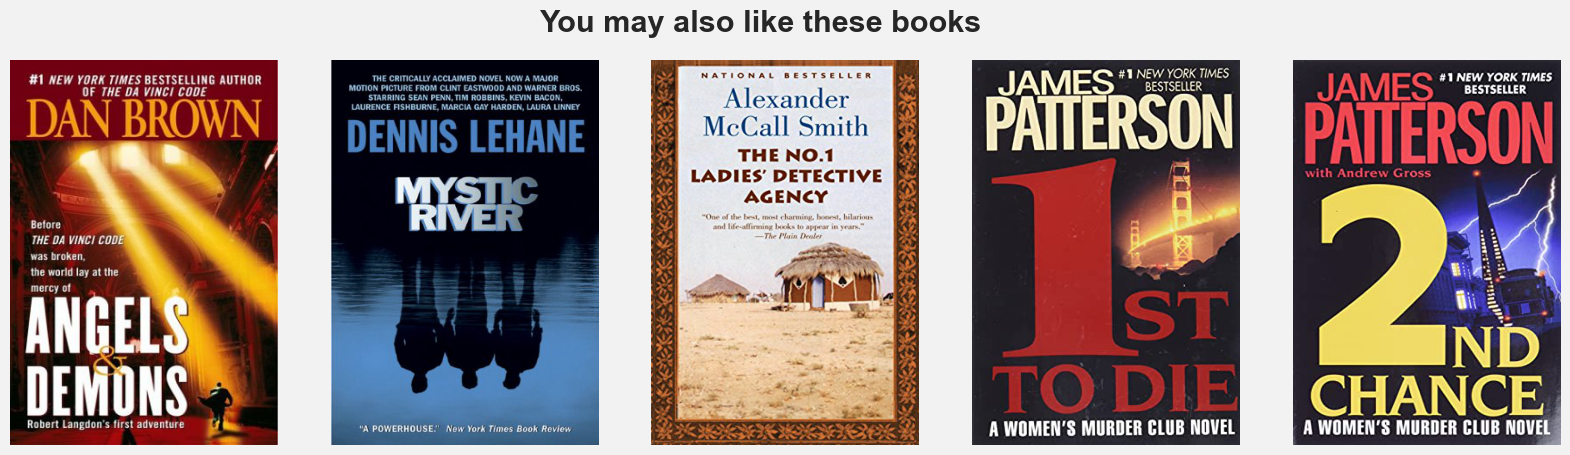

In [82]:
# Executing the item-based recommendation system
# Recommendation

item_based_recommender('The Da Vinci Code')

In [83]:
# Executing the item-based recommendation system
# No related books to recommend

item_based_recommender('Orson Welles')

There are no recommendations for this book. Try:

The Pelican Brief
Seabiscuit


In [84]:
# Executing the item-based recommendation system
# Book not found

item_based_recommender('Sherlock Holmes')

Cannot find this book in the dataset. Please check spelling or try another one.


### Content-Based with Demographics

In [85]:
# Creating the content-based recommendation system

def content_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in bookrec_65['book_title'].values:
        
        rating_counts = pd.DataFrame(bookrec_65['book_title'].value_counts())
        rare_books = rating_counts[rating_counts['book_title'] <= 10].index
        common_books = bookrec_65[~bookrec_65['book_title'].isin(rare_books)]
        
        if book_title in rare_books:
            
            random = pd.Series(common_books['book_title'].unique()).sample(2).values
            print('\033[1m' + 'There are no recommendations for this book. Try:' + '\033[0m' '\n')
            print('{}'.format(random[0]))
            print('{}'.format(random[1]))
        
        else:
            
            common_books = common_books.drop_duplicates(subset = ['book_title'])
            common_books.reset_index(inplace = True)
            common_books['index'] = [i for i in range(common_books.shape[0])]
            target_cols = ['book_title', 'book_author']
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(
                common_books[target_cols].shape[0])]
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            index = common_books[common_books['book_title'] == book_title]['index'].values[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books, key = lambda x:x[1], reverse = True)[1:6]
            
            books = []
            for i in range(len(sorted_sim_books)):
                books.append(common_books[common_books['index'] == sorted_sim_books[i][0]]['book_title'].item())
            
            fig, axs = plt.subplots(1, 5, figsize  = (20, 5), facecolor = '#f2f2f2')
            fig.suptitle('You may also like these books', size = 22, weight = 'bold')
            
            for i in range(len(books)):
        
                url = common_books.loc[common_books['book_title'] == books[i], 'image_url_l'][:1].values[0]
                headers = {'user-agent':
           'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
                im = Image.open(requests.get(url, stream = True, headers = headers).raw)
                axs[i].imshow(im, aspect = 'auto')
                axs[i].axis('off')
                fig.show()
                     
    else:
        
        print('Cannot find this book in the dataset. Please check spelling or try another one.')

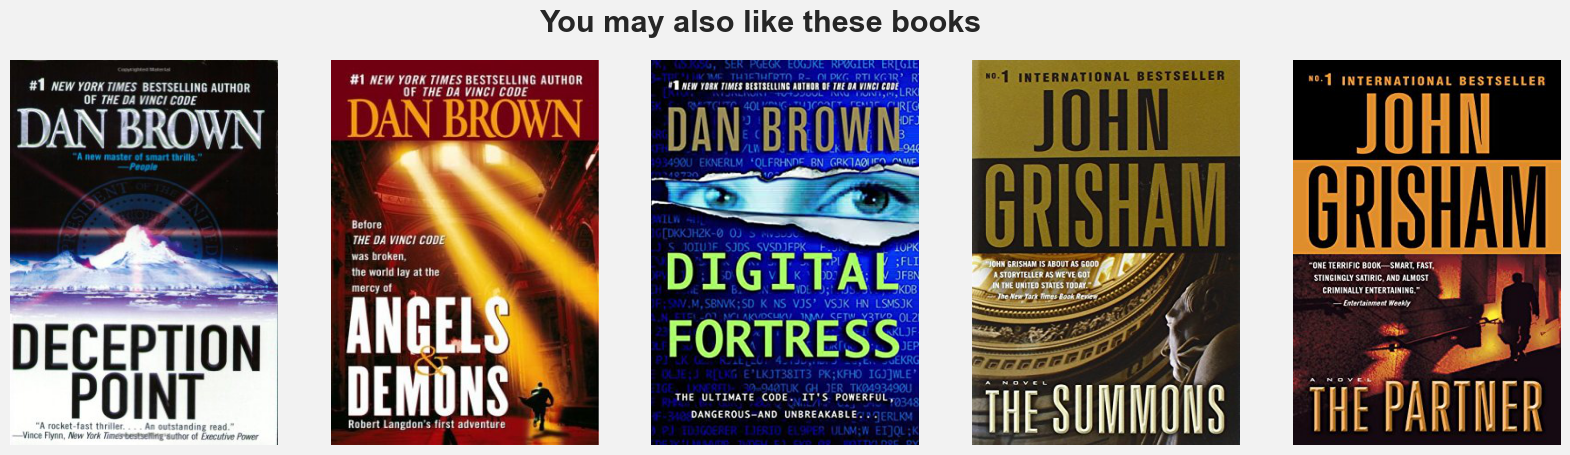

In [86]:
# Executing the content-based recommendation system
# Recommendation

content_based_recommender('The Da Vinci Code')

In [87]:
# Executing the content-based recommendation system
# No related books to recommend

content_based_recommender('Orson Welles')

There are no recommendations for this book. Try:

The Poisonwood Bible: A Novel
Mystic River


In [88]:
# Executing the content-based recommendation system
# Book not found

content_based_recommender('Sherlock Holmes')

Cannot find this book in the dataset. Please check spelling or try another one.
